IMPORT THE LIBRARIES

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

READ THE DATASET

In [2]:
df = pd.read_csv("chronic_kidney_disease.csv")

In [3]:
print("The dataset shape is {}".format(df.shape))

The dataset shape is (400, 26)


In [4]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
df.columns

Index(['id', 'age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 'pcc', 'ba', 'bgr',
       'bu', 'sc', 'sod', 'pot', 'hemo', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

UNDERSTANDING DATATYPES AND SUMMARY OF FEATURES

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,400.0,199.500000,115.614301,0.000,99.75,199.50,299.25,399.000
age,391.0,51.483376,17.169714,2.000,42.00,55.00,64.50,90.000
bp,388.0,76.469072,13.683637,50.000,70.00,80.00,80.00,180.000
sg,353.0,1.017408,0.005717,1.005,1.01,1.02,1.02,1.025
al,354.0,1.016949,1.352679,0.000,0.00,0.00,2.00,5.000
su,351.0,0.450142,1.099191,0.000,0.00,0.00,0.00,5.000
bgr,356.0,148.036517,79.281714,22.000,99.00,121.00,163.00,490.000
bu,381.0,57.425722,50.503006,1.500,27.00,42.00,66.00,391.000
sc,383.0,3.072454,5.741126,0.400,0.90,1.30,2.80,76.000
sod,313.0,137.528754,10.408752,4.500,135.00,138.00,142.00,163.000


In [9]:
for col in df:
    unique=df[col].value_counts()
    print(unique,"\n========================= \n")

0      1
263    1
273    1
272    1
271    1
      ..
130    1
129    1
128    1
127    1
399    1
Name: id, Length: 400, dtype: int64 

60.0    19
65.0    17
48.0    12
55.0    12
50.0    12
        ..
83.0     1
27.0     1
14.0     1
81.0     1
79.0     1
Name: age, Length: 76, dtype: int64 

80.0     116
70.0     112
60.0      71
90.0      53
100.0     25
50.0       5
110.0      3
140.0      1
180.0      1
120.0      1
Name: bp, dtype: int64 

1.020    106
1.010     84
1.025     81
1.015     75
1.005      7
Name: sg, dtype: int64 

0.0    199
1.0     44
2.0     43
3.0     43
4.0     24
5.0      1
Name: al, dtype: int64 

0.0    290
2.0     18
3.0     14
4.0     13
1.0     13
5.0      3
Name: su, dtype: int64 

normal      201
abnormal     47
Name: rbc, dtype: int64 

normal      259
abnormal     76
Name: pc, dtype: int64 

notpresent    354
present        42
Name: pcc, dtype: int64 

notpresent    374
present        22
Name: ba, dtype: int64 

99.0     10
93.0      9
100.0     9
107

CLEANING THE DATASET

In [16]:
# cleaning 'PCV'
df['pcv']=df['pcv'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t43','43').replace('\t?','Nan'))

# cleaning "WC"
df['wc']=df['wc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan').replace('\t6200','6200').replace('\t8400','8400'))

# cleaning "RC"
df['rc']=df['rc'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\t?','Nan'))

# cleaning "dm"
df['dm']=df['dm'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no').replace('\tyes','yes').replace(' yes','yes'))

# cleaning "CAD"
df['cad']=df['cad'].apply(lambda x:x if type(x)==type(3.5) else x.replace('\tno','no'))

# cleaning "Classification"
df['classification']=df['classification'].apply(lambda x:x if type(x)==type(3.5) else x.replace('ckd\t','ckd'))

In [17]:
mistyped=[['pcv','rc','wc']]
for i in mistyped:
    df[i]=df[i].astype('float')

In [18]:
cat_cols=list(df.select_dtypes('object'))
cat_cols

['rbc',
 'pc',
 'pcc',
 'ba',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane',
 'classification']

In [19]:
num_cols=list(df.select_dtypes(['int64','float64']))
num_cols

['id',
 'age',
 'bp',
 'sg',
 'al',
 'su',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc']

HANDLING THE MISSING VALUES

In [20]:
df.isnull().sum().sort_values(ascending=False)

rbc               152
pc                 65
pcc                 4
ba                  4
cad                 2
dm                  2
htn                 2
ane                 1
pe                  1
appet               1
id                  0
hemo                0
rc                  0
wc                  0
pcv                 0
sod                 0
pot                 0
age                 0
sc                  0
bu                  0
bgr                 0
su                  0
al                  0
sg                  0
bp                  0
classification      0
dtype: int64

In [21]:
for col in num_cols:
    df[col]=df[col].fillna(df[col].median())

In [22]:
df['rbc'].fillna('normal',inplace=True)
df['pc'].fillna('normal',inplace=True)
df['pcc'].fillna('notpresent',inplace=True)
df['ba'].fillna('notpresent',inplace=True)
df['htn'].fillna('no',inplace=True)
df['dm'].fillna('no',inplace=True)
df['cad'].fillna('no',inplace=True)
df['appet'].fillna('good',inplace=True)
df['pe'].fillna('no',inplace=True)
df['ane'].fillna('no',inplace=True)

In [23]:
df.isna().sum().sort_values(ascending=False)

id                0
age               0
ane               0
pe                0
appet             0
cad               0
dm                0
htn               0
rc                0
wc                0
pcv               0
hemo              0
pot               0
sod               0
sc                0
bu                0
bgr               0
ba                0
pcc               0
pc                0
rbc               0
su                0
al                0
sg                0
bp                0
classification    0
dtype: int64

REPLACING THE MISSING VALUES

In [24]:
df['classification']=df['classification'].map({'ckd':1,'notckd':0})

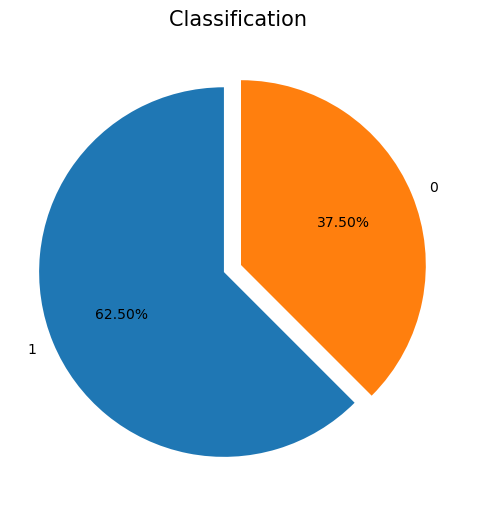

In [25]:
attr_count=df['classification'].value_counts()
attr_label=df['classification'].value_counts().index

# plot
fig,ax=plt.subplots(figsize=(14,6))
ax.pie(attr_count,explode=(0.1,0),labels=attr_label,autopct='%.2f%%',startangle=90)
ax.set_title("Classification ",fontsize=15)
plt.show()

NUMERICAL RELATIONSHIP

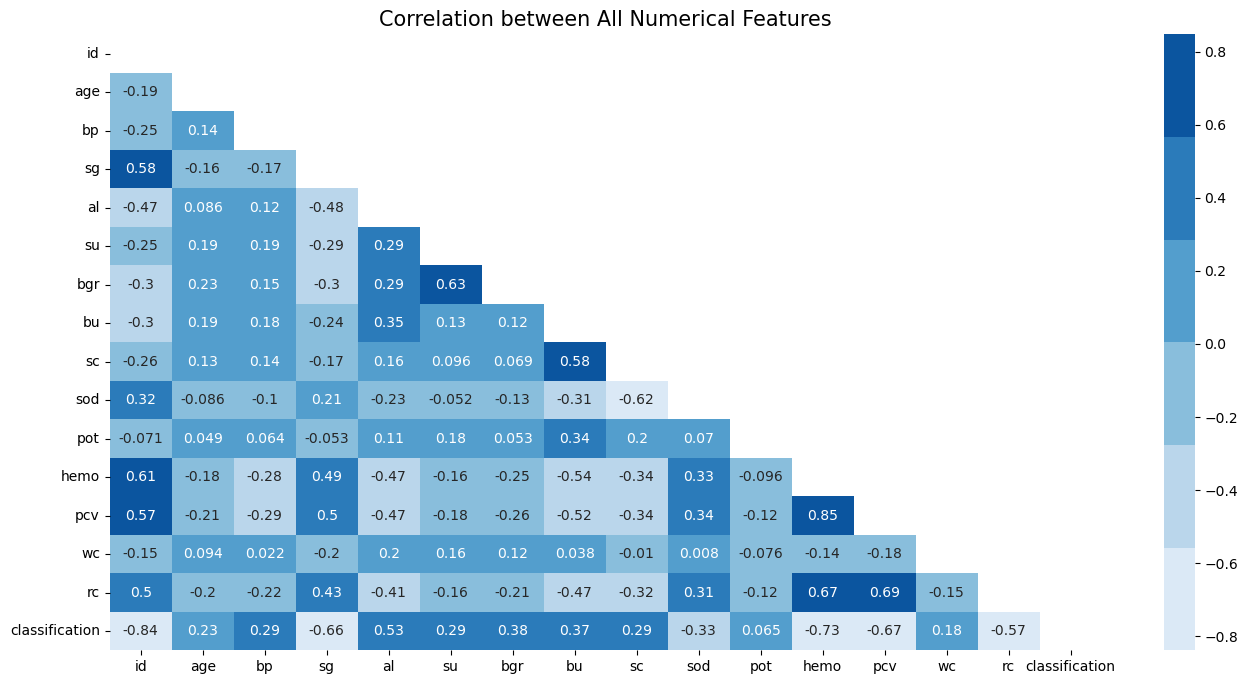

In [26]:
plt.figure(figsize=(16,8))
plt.title('Correlation between All Numerical Features',size=15)

# create mask
mask=np.triu(np.ones_like(df.corr()))

# create colormap
colormap=sns.color_palette('Blues')
# plot heatmap
sns.heatmap(df.corr(),annot=True,cmap=colormap,mask=mask)
plt.show()

LABEL ENCODING

In [27]:
df['rbc']=df['rbc'].map({'normal':0,'abnormal':1})
df['pc']=df['pc'].map({'normal':0,'abnormal':1})
df['pcc']=df['pcc'].map({'notpresent':0,'present':1})
df['ba']=df['ba'].map({'notpresent':0,'present':1})
df['htn']=df['htn'].map({'no':0,'yes':1})
df['dm']=df['dm'].map({'no':0,'yes':1})
df['cad']=df['cad'].map({'no':0,'yes':1})
df['pe']=df['pe'].map({'no':0,'yes':1})
df['ane']=df['ane'].map({'no':0,'yes':1})
df['appet']=df['appet'].map({'good':0,'poor':1})